In [1]:
from linReg_utils import *
import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
from pylab import rcParams
import pandas as pd

params = {'axes.spines.top'    : False,
          'axes.spines.right'  : False,
          'text.usetex': True,
          'axes.labelsize': 15, 
          'axes.titlesize': 12,
          'font.size': 12, 
          'legend.fontsize': 12, 
          'xtick.labelsize': 10,
          'ytick.labelsize': 15,
          'ytick.direction':'in',
          'font.family': 'serif',}

mpl.pyplot.rcParams.update(params)

/Users/Khang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


# Import data 

In [13]:
family = loadmat('data/colex_family.mat')
climate = loadmat('data/colex_climate.mat')
geography = loadmat('data/colex_geography.mat')
factors = [family, climate, geography]

mc_matrices = loadmat('data/MCColex.mat')
mc_usf = loadmat('data/usf_MCColex.mat')

usf_family = loadmat('data/usf_colex_family.mat')
usf_climate = loadmat('data/usf_colex_climate.mat')
usf_geography = loadmat('data/usf_colex_geography.mat')
usf_factors = [usf_family, usf_climate, usf_geography]

association = load_npz('data/hbc.npz')
usf_association = load_npz('data/usf.npz')
frequency = load_npz('data/frequency.npz')
similarity = load_npz('data/w2v.npz')
concrete = load_npz('data/conc.npz')
valence = load_npz('data/valence.npz')
predictors = [association, similarity, concrete, valence, frequency]

eng_ex = pd.read_csv('data/english.csv')
usf_eng_ex = pd.read_csv('data/usf_english.csv')

super_ex = pd.read_csv('data/superordinate_pairs.csv')
usf_super_ex = pd.read_csv('data/usf_superordinate.csv')
excludes = [eng_ex,usf_eng_ex,super_ex,usf_super_ex]

nonzero = pd.read_csv('data/nonzeros.csv')
usf_nonzero = pd.read_csv('data/usf_nonzeros.csv')
non_zeros = [nonzero, usf_nonzero]

In [14]:
def framework(matrices, usf_matrix, excludes, non_zeros, superord = False):
    if superord == False:
        ex = [excludes[0]] + [excludes[2]]
        usf_ex = [excludes[1]] + [excludes[3]]
    else:
        ex = [excludes[0]]
        usf_ex = [excludes[1]]
        
    lin = LinReg(matrices, predictors, ex, non_zeros[0] )
    mean_r, std_r, mean_coeff, std_coeff = lin.spearman_r()
    usf_lin = LinReg(usf_matrix, [usf_association], usf_ex, non_zeros[1])
    mean_usf, std_usf = usf_lin.spearman_r(r_multi = False)
    mean_r.insert(1, mean_usf[0])
    std_r.insert(1, std_usf[0])
        
    return(mean_r, std_r, mean_coeff, std_coeff)

# Stratified bootstrapping

In [4]:
means, errors = [], []
means_coeff, errors_coeff = [], []

for i in range(3):
    mean_r, std_r, mean_coeff, std_coeff =\
    framework(factors[i], usf_factors[i], excludes, non_zeros)
    means.append(mean_r)
    errors.append([1.96*i for i in std_r])
    means_coeff.append(mean_coeff)
    errors_coeff.append([1.96*i for i in std_coeff])

Sample #: 999


<Figure size 1080x720 with 0 Axes>

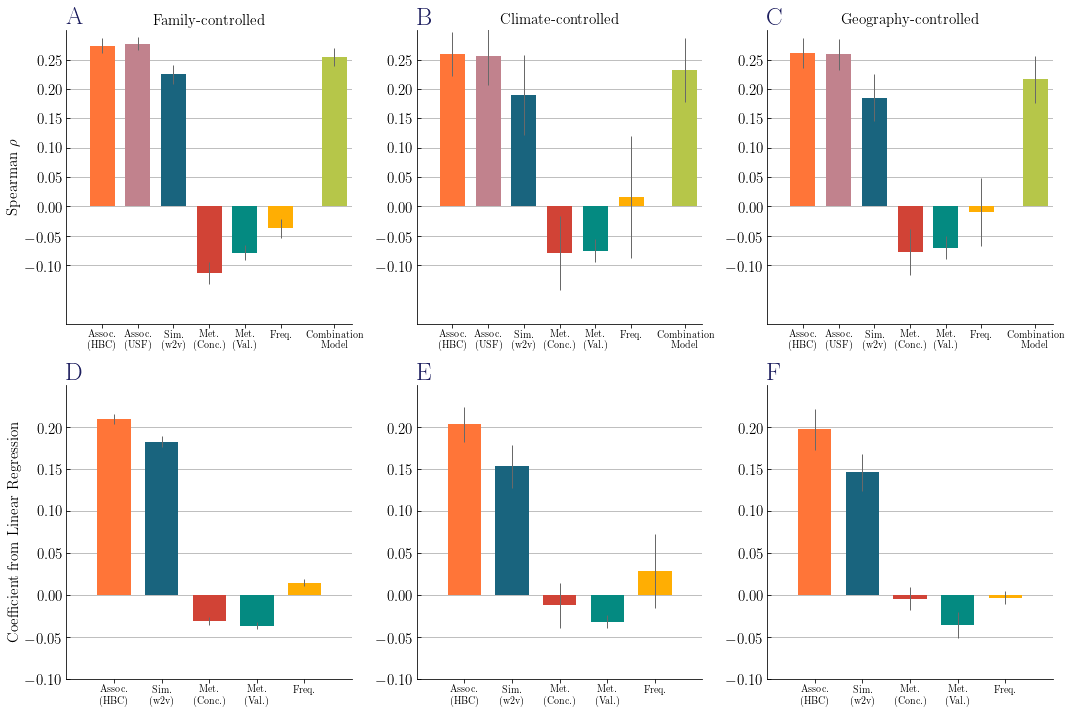

In [9]:
rcParams['figure.figsize'] = 15, 10
draw_family(means, errors, means_coeff, errors_coeff, 'sb_analysis2')

# Monte-Carlo

In [6]:
mean_r, std_r, mean_coeff, std_coeff =\
framework(mc_matrices, mc_usf, excludes, non_zeros)

Sample #: 999


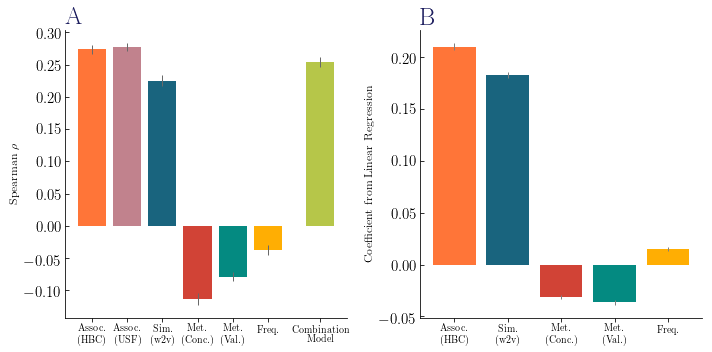

In [11]:
rcParams['figure.figsize'] = 10, 5
plot(mean_r, std_r, mean_coeff, std_coeff, 'mc_analysis2')

# Exclude superordinate pairs

## Stratified-bootstrapping

In [15]:
means, errors = [], []
means_coeff, errors_coeff = [], []

for i in range(3):
    mean_r, std_r, mean_coeff, std_coeff =\
    framework(factors[i], usf_factors[i], excludes, non_zeros, True)
    means.append(mean_r)
    errors.append([1.96*i for i in std_r])
    means_coeff.append(mean_coeff)
    errors_coeff.append([1.96*i for i in std_coeff])

Sample #: 999


<Figure size 1080x720 with 0 Axes>

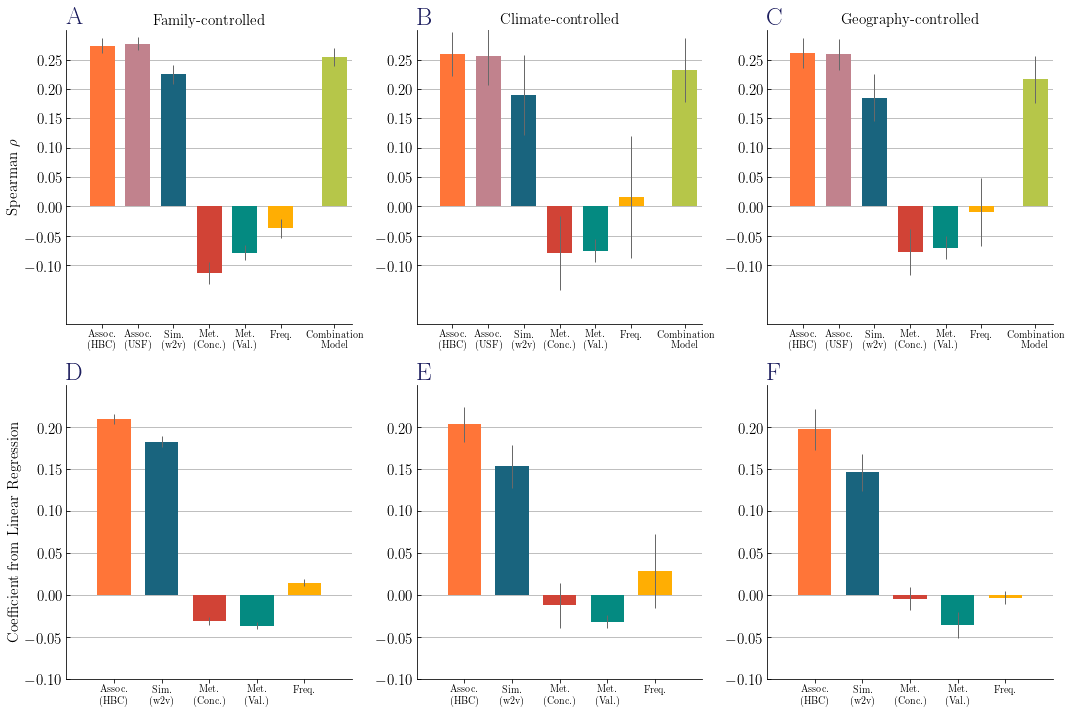

In [17]:
rcParams['figure.figsize'] = 15, 10
draw_family(means, errors, means_coeff, errors_coeff, 'super_sb_analysis2')

## Monte-Carlo

In [16]:
mean_r, std_r, mean_coeff, std_coeff =\
framework(mc_matrices, mc_usf, excludes, non_zeros, True)

Sample #: 999


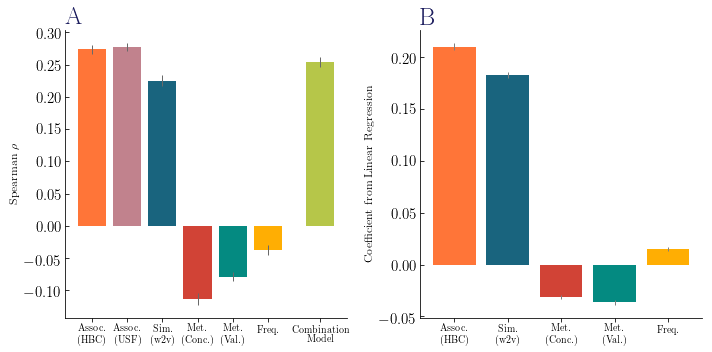

In [18]:
rcParams['figure.figsize'] = 10, 5
plot(mean_r, std_r, mean_coeff, std_coeff, 'super_mc_analysis2')